#📌 Extracción

Para iniciar tu análisis, necesitarás importar los datos de la API de Telecom X. Estos datos están disponibles en formato JSON y contienen información esencial sobre los clientes, incluyendo datos demográficos, tipo de servicio contratado y estado de evasión.

📌 Enlace de la API:
challenge2-data-science-LATAM/TelecomX_Data.json at main · ingridcristh/challenge2-data-science-LATAM

In [5]:
# importando librerias
import pandas as pd

In [3]:
ruta_datos = '/content/drive/MyDrive/análisis de evasión de clientes/TelecomX_Data.json'

In [14]:
df = pd.read_json(ruta_datos)
df

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


#🔧 Transformación

de la columna 3 a la 6 tengo otros datos dentro de otros datos por lo que vamos a normalizar los datos que tenemos adentro  de esas columnas

In [17]:
# ver datos de la columna 3
display(df.iloc[0,3])

{'PhoneService': 'Yes', 'MultipleLines': 'No'}

In [18]:
# concatenando nuevas columans al df
df = pd.concat([df, pd.json_normalize(df.iloc[:, 3])], axis=1)

In [19]:
df.head()

,customerID,Churn,customer,phone,internet,account,PhoneService,MultipleLines
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Yes,No
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Yes,Yes
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Yes,No
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Yes,No
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Yes,No


In [20]:
# ver datos de la columna 2
display(df.iloc[0,2])

{'gender': 'Female',
 'SeniorCitizen': 0,
 'Partner': 'Yes',
 'Dependents': 'Yes',
 'tenure': 9}

In [22]:
# ver datos de la columna 4
display(df.iloc[0,4])

{'InternetService': 'DSL',
 'OnlineSecurity': 'No',
 'OnlineBackup': 'Yes',
 'DeviceProtection': 'No',
 'TechSupport': 'Yes',
 'StreamingTV': 'Yes',
 'StreamingMovies': 'No'}

In [23]:
# ver datos de la columna 5
display(df.iloc[0,5])

{'Contract': 'One year',
 'PaperlessBilling': 'Yes',
 'PaymentMethod': 'Mailed check',
 'Charges': {'Monthly': 65.6, 'Total': '593.3'}}

In [24]:
# haciendo lo mismo con la columna 2,4 y 5
df = pd.concat([df, pd.json_normalize(df.iloc[:, 2])], axis=1)
df = pd.concat([df, pd.json_normalize(df.iloc[:, 4])], axis=1)
df = pd.concat([df, pd.json_normalize(df.iloc[:, 5])], axis=1)
df.head()


,customerID,Churn,customer,phone,internet,account,PhoneService,MultipleLines,gender,SeniorCitizen,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Yes,No,Female,0,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Yes,Yes,Male,0,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Yes,No,Male,0,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Yes,No,Male,1,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Yes,No,Female,1,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [27]:
# Como ya extrajimos los datos de las columnas, ahora solo elimino las que ya no necesito
df = df.drop(df.columns[[2, 3, 4, 5]], axis=1)
df.head()


,customerID,Churn,PhoneService,MultipleLines,gender,SeniorCitizen,Partner,Dependents,tenure,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Yes,No,Female,0,Yes,Yes,9,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Yes,Yes,Male,0,No,No,9,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Yes,No,Male,0,No,No,4,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Yes,No,Male,1,Yes,No,13,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Yes,No,Female,1,Yes,No,3,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [60]:
# Crear un nuevo DataFrame que muestre la cantidad de valores NaN y vacíos por columna
missing_values_df = pd.DataFrame({
    'NaN': df.isna().sum(),
    'Empty_String': (df == '').sum(),
    'Space_String': (df == ' ').sum()
})

# Mostrar el resultado
display(missing_values_df)

,NaN,Empty_String,Space_String
customerID,0,0,0
Churn,0,224,0
PhoneService,0,0,0
MultipleLines,0,0,0
gender,0,0,0
SeniorCitizen,0,0,0
Partner,0,0,0
Dependents,0,0,0
tenure,0,0,0
InternetService,0,0,0


In [61]:
# Filtrar una fila con un Empty_String en la columna 'Churn'
fila_empty_churn = df[df['Churn'] == ''].sample(1)

# Filtrar una fila con un Space_String en la columna 'Charges.Total'
fila_space_charges = df[df['Charges.Total'] == ' '].sample(1)

# Mostrar ambas filas
display(fila_empty_churn)
display(fila_space_charges)


,customerID,Churn,PhoneService,MultipleLines,gender,SeniorCitizen,Partner,Dependents,tenure,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
7211,9920-GNDMB,,Yes,Yes,Male,0,No,No,9,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,76.25,684.85


,customerID,Churn,PhoneService,MultipleLines,gender,SeniorCitizen,Partner,Dependents,tenure,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
2930,4075-WKNIU,No,Yes,Yes,Female,0,Yes,Yes,0,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,


In [63]:
# hare una limpieza de datos que contengan alguna columna con un valor un Space_String o Empty_String para limpiar el df
df = df.drop(df[df['Churn'] == ''].index)
df = df.drop(df[df['Charges.Total'] == ' '].index)

In [67]:
# veremos la prueba si el df está limpio
# Crear un nuevo DataFrame que muestre la cantidad de valores NaN y vacíos por columna
missing_values_df = pd.DataFrame({
    'NaN': df.isna().sum(),
    'Empty_String': (df == '').sum(),
    'Space_String': (df == ' ').sum()
})

# Mostrar el resultado
display(missing_values_df)


,NaN,Empty_String,Space_String
customerID,0,0,0
Churn,0,0,0
PhoneService,0,0,0
MultipleLines,0,0,0
gender,0,0,0
SeniorCitizen,0,0,0
Partner,0,0,0
Dependents,0,0,0
tenure,0,0,0
InternetService,0,0,0


In [70]:
# ver cuentas filas y columnas tengo ahora en el df
df.shape

(7032, 21)

In [110]:
df.sample(1).T

,7084
customerID,9755-JHNMN
Churn,No
PhoneService,Yes
MultipleLines,No
gender,Female
SeniorCitizen,0
Partner,No
Dependents,No
tenure,49
InternetService,DSL


In [120]:
# ver mi tipo de datos por columna
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   Churn             7032 non-null   object 
 2   PhoneService      7032 non-null   object 
 3   MultipleLines     7032 non-null   object 
 4   gender            7032 non-null   object 
 5   SeniorCitizen     7032 non-null   int64  
 6   Partner           7032 non-null   object 
 7   Dependents        7032 non-null   object 
 8   tenure            7032 non-null   int64  
 9   InternetService   7032 non-null   object 
 10  OnlineSecurity    7032 non-null   object 
 11  OnlineBackup      7032 non-null   object 
 12  DeviceProtection  7032 non-null   object 
 13  TechSupport       7032 non-null   object 
 14  StreamingTV       7032 non-null   object 
 15  StreamingMovies   7032 non-null   object 
 16  Contract          7032 non-null   object 
 17  

,customerID,Churn,PhoneService,MultipleLines,gender,SeniorCitizen,Partner,Dependents,tenure,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Yes,No,Female,0,Yes,Yes,9,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Yes,Yes,Male,0,No,No,9,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Yes,No,Male,0,No,No,4,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Yes,No,Male,1,Yes,No,13,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Yes,No,Female,1,Yes,No,3,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


- `Charges.Monthly`: total de todos los servicios del cliente por mes
- `Charges.Total`: total gastado por el cliente

quiero dividir los cargos totales entre cargos mensuales para asi obtener los meses que pago tuvo cada persona y despues de eso tener la cantidad total de dias que tuvo cada persona el contrato eso para cada fila y la nueva columna del df se llamará Cuentas_Diarias

In [138]:

import pandas as pd
# Convert 'Charges.Total' and 'Charges.Monthly' to numeric, coercing errors to NaN
df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')
df['Charges.Monthly'] = pd.to_numeric(df['Charges.Monthly'], errors='coerce')
# Calculate the number of months
# Add a small epsilon to Charges.Monthly to avoid division by zero if any value is 0 after coercion
epsilon = 1e-9
df['Months_Paid'] = df['Charges.Total'] / (df['Charges.Monthly'] + epsilon)
# Calculate the total number of days (assuming 30 days per month for estimation)
df['Cuentas_Diarias'] = df['Months_Paid'] * 30
df.head()

,customerID,Churn,PhoneService,MultipleLines,gender,SeniorCitizen,Partner,Dependents,tenure,InternetService,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Months_Paid,Cuentas_Diarias
0,0002-ORFBO,No,Yes,No,Female,0,Yes,Yes,9,DSL,...,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,9.044207,271.326220
1,0003-MKNFE,No,Yes,Yes,Male,0,No,No,9,DSL,...,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,9.055092,271.652755
2,0004-TLHLJ,Yes,Yes,No,Male,0,No,No,4,Fiber optic,...,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,3.800406,114.012179
3,0011-IGKFF,Yes,Yes,No,Male,1,Yes,No,13,Fiber optic,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,12.631122,378.933673
4,0013-EXCHZ,Yes,Yes,No,Female,1,Yes,No,3,Fiber optic,...,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,3.187128,95.613826


#📊 Carga y análisis

en muchas columnas aparece yes o no , pero en otras aparecen en otros textos, veré cuales datos hay en las columnas donde no hay un yes o no

In [71]:
# importar libreria matplotlib para hacer graficos
import matplotlib.pyplot as plt

In [72]:
print('de la columna de Contract: '+ df['Contract'].unique())
print('de la columna de InternetService: '+df['InternetService'].unique())
print('de la columna de PaymentMethod: '+df['PaymentMethod'].unique())

['de la columna de Contract: One year'
 'de la columna de Contract: Month-to-month'
 'de la columna de Contract: Two year']
['de la columna de InternetService: DSL'
 'de la columna de InternetService: Fiber optic'
 'de la columna de InternetService: No']
['de la columna de PaymentMethod: Mailed check'
 'de la columna de PaymentMethod: Electronic check'
 'de la columna de PaymentMethod: Credit card (automatic)'
 'de la columna de PaymentMethod: Bank transfer (automatic)']


tengo estas columnas

Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 * 0   customerID        7267 non-null   object
 * 1   Churn             7267 non-null   object
 * 2   PhoneService      7267 non-null   object
 * 3   MultipleLines     7267 non-null   object
 * 4   gender            7267 non-null   object
 * 5   SeniorCitizen     7267 non-null   int64  
 * 6   Partner           7267 non-null   object
 * 7   Dependents        7267 non-null   object
 * 8   tenure            7267 non-null   int64  
 * 9   InternetService   7267 non-null   object
 * 10  OnlineSecurity    7267 non-null   object
 * 11  OnlineBackup      7267 non-null   object
 * 12  DeviceProtection  7267 non-null   object
 * 13  TechSupport       7267 non-null   object
 * 14  StreamingTV       7267 non-null   object
 * 15  StreamingMovies   7267 non-null   object
 * 16  Contract          7267 non-null   object
 * 17  PaperlessBilling  7267 non-null   object
 * 18  PaymentMethod     7267 non-null   object
 * 19  Charges.Monthly   7267 non-null   float64
 * 20  Charges.Total     7267 non-null   object



In [73]:
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [140]:
# prompt: quiero saber el promedio de Cuentas_Diarias de las filas todas las filas que contienen Churn == Yes

import pandas as pd
# Filter the DataFrame to include only rows where 'Churn' is 'Yes'
churn_yes_df = df[df['Churn'] == 'Yes'].copy()
churn_no_df = df[df['Churn'] == 'No'].copy()

# Convert 'Cuentas_Diarias' to numeric, coercing errors to NaN
churn_yes_df['Cuentas_Diarias'] = pd.to_numeric(churn_yes_df['Cuentas_Diarias'], errors='coerce')
churn_no_df['Cuentas_Diarias'] = pd.to_numeric(churn_no_df['Cuentas_Diarias'], errors='coerce')

# Calculate the average of 'Cuentas_Diarias' for the filtered rows, dropping NaN values
average_cuentas_diarias_churn_yes = churn_yes_df['Cuentas_Diarias'].mean()
average_cuentas_diarias_churn_no = churn_no_df['Cuentas_Diarias'].mean()

# Display the resulto
print(f"El promedio de 'Cuentas_Diarias' para las filas con Churn == 'Yes' es: {average_cuentas_diarias_churn_yes}")
print(f"El promedio de 'Cuentas_Diarias' para las filas con Churn == 'No' es: {average_cuentas_diarias_churn_no}")


El promedio de 'Cuentas_Diarias' para las filas con Churn == 'Yes' es: 539.134005449989
El promedio de 'Cuentas_Diarias' para las filas con Churn == 'No' es: 1129.6805580342652


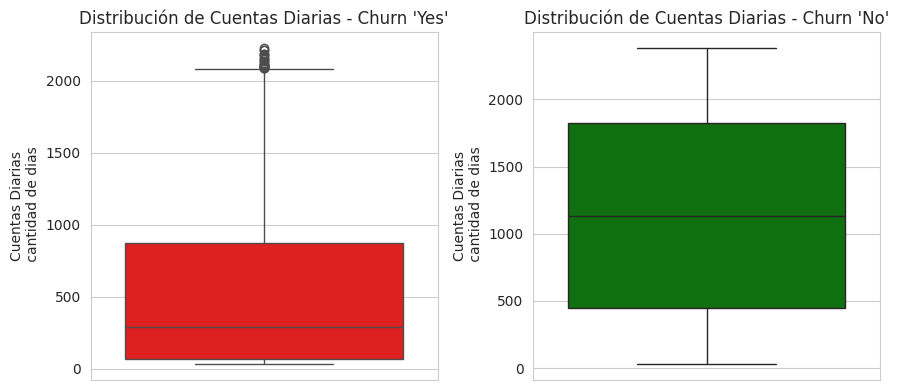

In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar el DataFrame según la condición de 'Churn'
churn_yes_df = df[df['Churn'] == 'Yes'].copy()
churn_no_df = df[df['Churn'] == 'No'].copy()

# Convertir 'Cuentas_Diarias' a tipo numérico
churn_yes_df['Cuentas_Diarias'] = pd.to_numeric(churn_yes_df['Cuentas_Diarias'], errors='coerce')
churn_no_df['Cuentas_Diarias'] = pd.to_numeric(churn_no_df['Cuentas_Diarias'], errors='coerce')

# Crear la figura y los subplots
fig, axes = plt.subplots(1, 2, figsize=(9, 4))

# Diagrama de caja para clientes con Churn == 'Yes'
sns.boxplot(y=churn_yes_df['Cuentas_Diarias'], ax=axes[0], color="red")
axes[0].set_title("Distribución de Cuentas Diarias - Churn 'Yes'")
axes[0].set_ylabel("Cuentas Diarias\n cantidad de dias")

# Diagrama de caja para clientes con Churn == 'No'
sns.boxplot(y=churn_no_df['Cuentas_Diarias'], ax=axes[1], color="green")
axes[1].set_title("Distribución de Cuentas Diarias - Churn 'No'")
axes[1].set_ylabel("Cuentas Diarias\n cantidad de dias")

#Guardar figura
plt.savefig('/content/sample_data/churn_total_charges_Cuenta_diaria.png')
# Ajustar el layout para mejor visualización
plt.tight_layout()
plt.show()


<ipython-input-145-ff9bc0d49abb>:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[1].boxplot([df[df['Churn'] == 'No']['Charges.Total'],


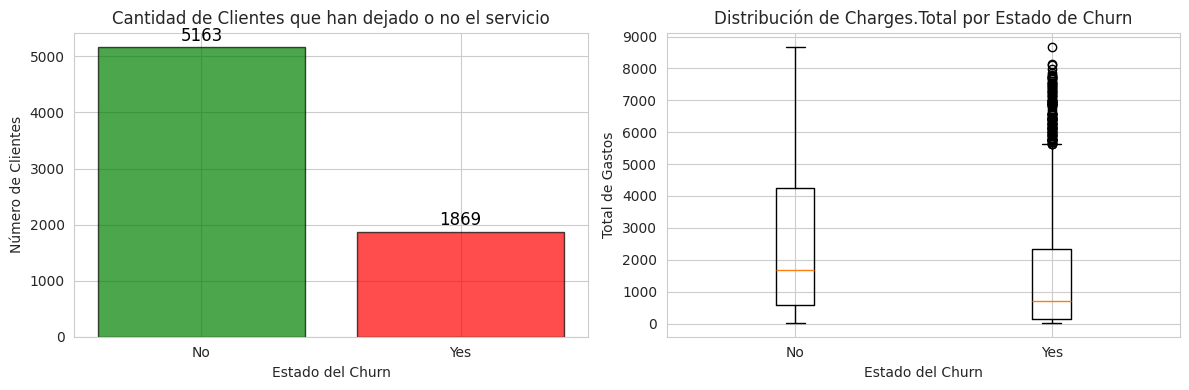

In [145]:

# Crear una figura con dos subgráficos
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

#  Gráfico de barras - Estado del Churn en el eje X y Número de Clientes en el eje Y
churn_counts = df['Churn'].value_counts()
axs[0].bar(churn_counts.index, churn_counts.values, color=['green', 'red'], alpha=0.7, edgecolor='black')
axs[0].set_title('Cantidad de Clientes que han dejado o no el servicio')
axs[0].set_xlabel('Estado del Churn')
axs[0].set_ylabel('Número de Clientes')
axs[0].grid(True)

# Agregar etiquetas de datos en las barras
for index, value in enumerate(churn_counts):
    axs[0].text(index, value + 50, str(value), ha='center', va='bottom', fontsize=12, color='black')

#  Boxplot - Distribución de `Charges.Total` agrupado por Churn
df['Charges.Total'] = df['Charges.Total'].astype(float)  # Convertir a número

axs[1].boxplot([df[df['Churn'] == 'No']['Charges.Total'],
                df[df['Churn'] == 'Yes']['Charges.Total']],
                labels=['No', 'Yes'])

# Configurar el eje Y para mostrar los valores en intervalos de 1000
axs[1].set_yticks(range(0, int(df['Charges.Total'].max()) + 1000, 1000))

axs[1].set_title('Distribución de Charges.Total por Estado de Churn')
axs[1].set_xlabel('Estado del Churn')
axs[1].set_ylabel('Total de Gastos')
axs[1].grid(True)

# guardar grafico en sample data
plt.savefig('/content/sample_data/churn_total_charges.png')
# Mostrar el gráfico
plt.tight_layout()
plt.show()

Ahora haremos 2 graficos, mostrearemos un grafico donde veremos si la persona es un SeniorCitizen para los que si, haremos un grafico de cantidad de esas personas que han dejado o no el servicio y para los que no son SeniorCitizen haremos otro grafico igual

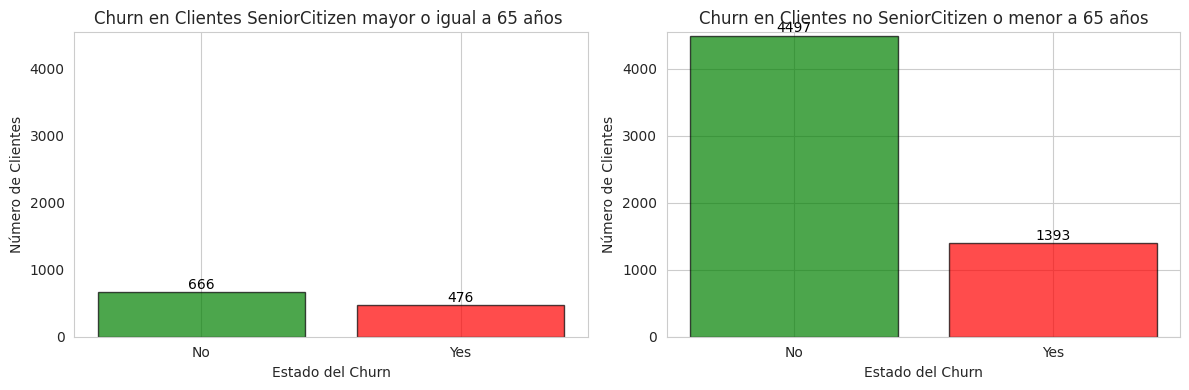

In [147]:
import matplotlib.pyplot as plt

# Filtrar el DataFrame para SeniorCitizen (considerando valores numéricos 1 y 0)
df_senior = df[df['SeniorCitizen'] == 1]
df_not_senior = df[df['SeniorCitizen'] == 0]

# Crear la figura y los subgráficos
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# 🔹 Gráfico para SeniorCitizen
senior_churn_counts = df_senior['Churn'].value_counts()
axs[0].bar(senior_churn_counts.index, senior_churn_counts.values, color=['green', 'red'], alpha=0.7, edgecolor='black')
axs[0].set_title('Churn en Clientes SeniorCitizen mayor o igual a 65 años ')
axs[0].set_xlabel('Estado del Churn')
axs[0].set_ylabel('Número de Clientes')
axs[0].grid(axis='y')

# Agregar etiquetas de datos en cada barra
for index, value in enumerate(senior_churn_counts.values):
    axs[0].text(index, value + 5, str(value), ha='center', va='bottom', fontsize=10, color='black')

# 🔹 Gráfico para no SeniorCitizen
not_senior_churn_counts = df_not_senior['Churn'].value_counts()
axs[1].bar(not_senior_churn_counts.index, not_senior_churn_counts.values, color=['green', 'red'], alpha=0.7, edgecolor='black')
axs[1].set_title('Churn en Clientes no SeniorCitizen o menor a 65 años')
axs[1].set_xlabel('Estado del Churn')
axs[1].set_ylabel('Número de Clientes')
axs[1].grid(axis='y')

# Agregar etiquetas de datos en cada barra
for index, value in enumerate(not_senior_churn_counts.values):
    axs[1].text(index, value + 5, str(value), ha='center', va='bottom', fontsize=10, color='black')

# 🔹 Aplicar la misma escala en el eje Y
max_y = max(senior_churn_counts.max(), not_senior_churn_counts.max())
axs[0].set_ylim(0, max_y + 50)
axs[1].set_ylim(0, max_y + 50)
# guardar grafico en sample data
plt.savefig('/content/sample_data/churn_senior_not_senior.png')
# Ajustar diseño y mostrar gráficos
plt.tight_layout()
plt.grid(True)
plt.show()

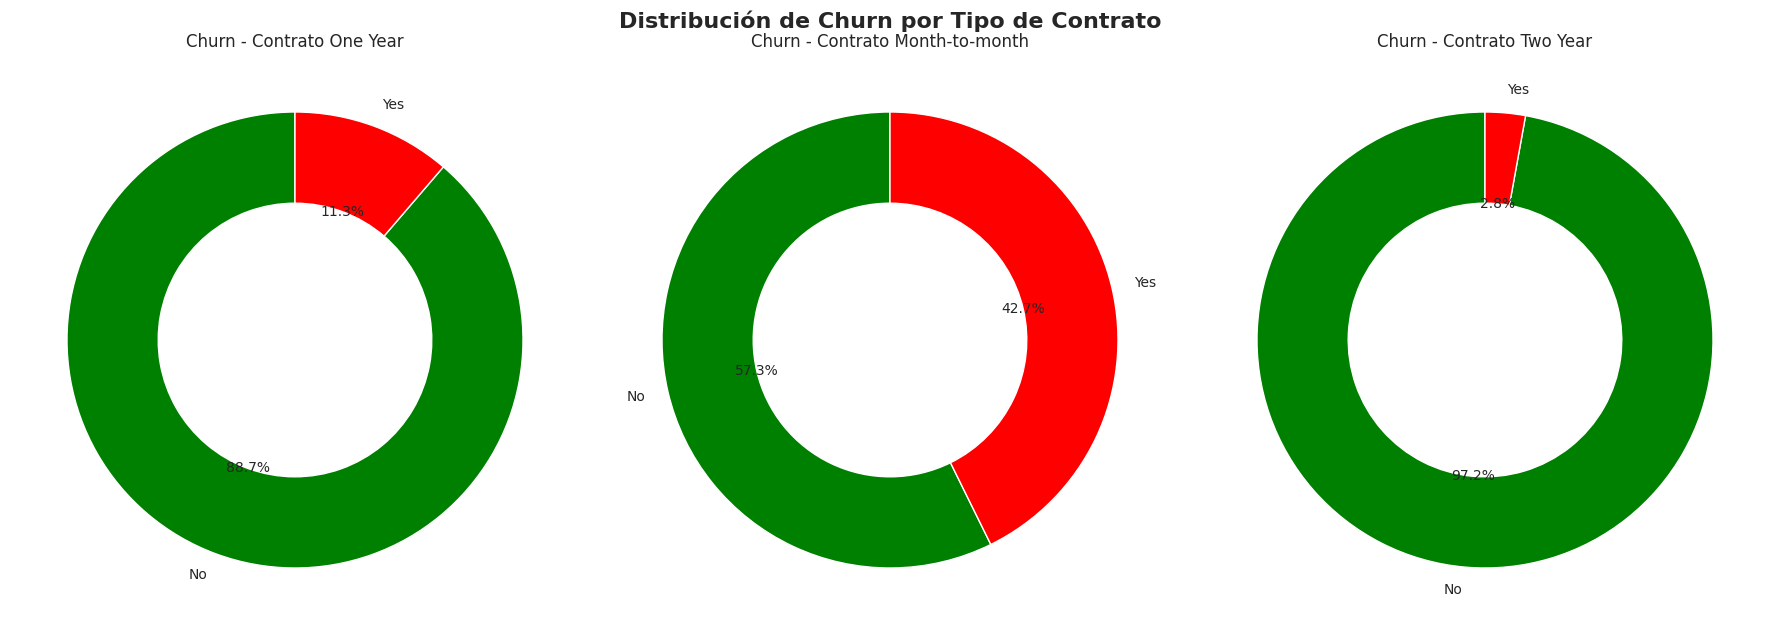

In [149]:
import matplotlib.pyplot as plt

# Filtrar los datos para cada tipo de contrato
df_one_year = df[df['Contract'] == 'One year']
df_monthly = df[df['Contract'] == 'Month-to-month']
df_two_year = df[df['Contract'] == 'Two year']

# Crear una figura con 3 subgráficos
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# 🔹 Gráfico de dona para "One year"
churn_counts_one_year = df_one_year['Churn'].value_counts()
axs[0].pie(churn_counts_one_year, labels=churn_counts_one_year.index, autopct='%1.1f%%',
           colors=['green', 'red'], startangle=90, wedgeprops={'width': 0.4})
axs[0].set_title('Churn - Contrato One Year')

# 🔹 Gráfico de dona para "Month-to-month"
churn_counts_monthly = df_monthly['Churn'].value_counts()
axs[1].pie(churn_counts_monthly, labels=churn_counts_monthly.index, autopct='%1.1f%%',
           colors=['green', 'red'], startangle=90, wedgeprops={'width': 0.4})
axs[1].set_title('Churn - Contrato Month-to-month')

# 🔹 Gráfico de dona para "Two year"
churn_counts_two_year = df_two_year['Churn'].value_counts()
axs[2].pie(churn_counts_two_year, labels=churn_counts_two_year.index, autopct='%1.1f%%',
           colors=['green', 'red'], startangle=90, wedgeprops={'width': 0.4})
axs[2].set_title('Churn - Contrato Two Year')
# guardar grafico en sample dat
plt.savefig('/content/sample_data/churn_contrato.png')


# Ajustar diseño y mostrar gráficos
plt.tight_layout()
plt.suptitle('Distribución de Churn por Tipo de Contrato', y=1.05, fontsize=16, weight='bold')
plt.show()


Al parecer ser las personas no contratan un servicio de Internet No van a poder tener ningún otro servicio de la empresa Por lo tanto vamos a ver un gráfico de El churm versus la cantidad de personas O bueno cuando la cantidad de personas no tiene un servicio de internet

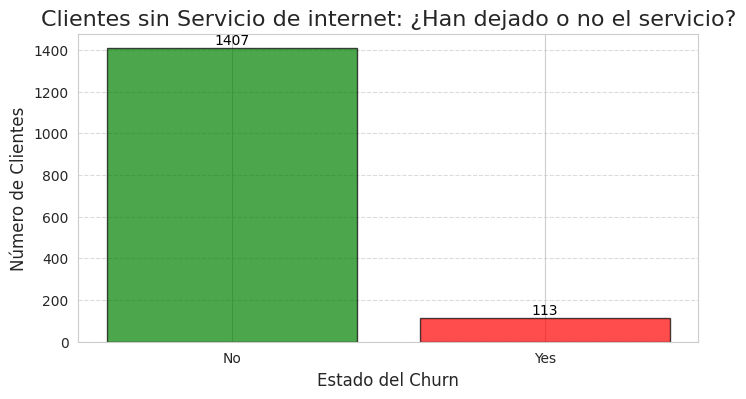

In [136]:

# Filtrar clientes sin servicio de Internet y contar el churn
churn_counts = df[df['InternetService'] == 'No']['Churn'].value_counts()

# Crear gráfico de barras
plt.figure(figsize=(8, 4))
bars = plt.bar(churn_counts.index, churn_counts.values, color=['green', 'red'], alpha=0.7, edgecolor='black')

# Añadir etiquetas de datos
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{int(bar.get_height())}',
             ha='center', va='bottom', fontsize=10, color='black')

# Configuración del gráfico
plt.title('Clientes sin Servicio de internet: ¿Han dejado o no el servicio?', fontsize=16)
plt.xlabel('Estado del Churn', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
# guardar grafico en sample data
plt.savefig('/content/sample_data/churn_nointernet.png')
# Mostrar el gráfico
plt.show()


In [112]:
 #2. Definir el customerID que queremos buscar
cliente_id_buscado = '9755-JHNMN'

# 3. Definir las columnas de los servicios adicionales a contar
servicios_adicionales_cols = [
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies'
]

# 4. Buscar la fila del cliente específico
cliente_fila = df[df['customerID'] == cliente_id_buscado]

# Verificar si el cliente fue encontrado
if not cliente_fila.empty:
    # 5. Obtener los datos de esa fila como una Serie (para fácil acceso)
    datos_cliente = cliente_fila.iloc[0] # .iloc[0] es porque la búsqueda devuelve un DataFrame de 1 fila

    # 6. Verificar si el cliente tiene servicio de Internet
    if datos_cliente['InternetService'] != 'No':
        # 7. Contar los servicios que dicen 'Yes'
        cantidad_servicios_yes = (datos_cliente[servicios_adicionales_cols] == 'Yes').sum()

        print(f"Cliente: {cliente_id_buscado}")
        print(f"Tiene servicio de Internet: SÍ ({datos_cliente['InternetService']})")
        print(f"Cantidad de servicios adicionales con 'Yes': {cantidad_servicios_yes}")
    else:
        print(f"Cliente: {cliente_id_buscado}")
        print(f"NO tiene servicio de Internet ({datos_cliente['InternetService']}). No se cuentan servicios adicionales.")
else:
    print(f"El cliente con customerID {cliente_id_buscado} no fue encontrado en el DataFrame.")


Cliente: 9755-JHNMN
Tiene servicio de Internet: SÍ (DSL)
Cantidad de servicios adicionales con 'Yes': 4


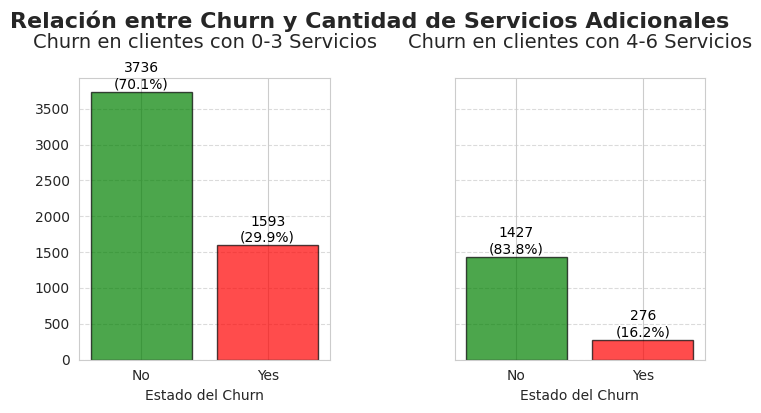

In [137]:
import matplotlib.pyplot as plt

# Filtrar los datos para los rangos de servicios adicionales sin modificar el DataFrame
df_rango_0_3 = df[(df[[
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]] == 'Yes').sum(axis=1).between(0, 3)]

df_rango_4_6 = df[(df[[
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]] == 'Yes').sum(axis=1).between(4, 6)]

# Obtener conteos de churn para cada rango
churn_counts = {
    '0-3 Servicios': df_rango_0_3['Churn'].value_counts(),
    '4-6 Servicios': df_rango_4_6['Churn'].value_counts()
}

# Crear gráfico con subplots
fig, axs = plt.subplots(1, 2, figsize=(7, 4), sharey=True)

# Graficar cada rango de churn
for i, (titulo, counts) in enumerate(churn_counts.items()):
    total = counts.sum()
    bars = axs[i].bar(counts.index, counts.values, color=['green', 'red'], alpha=0.7, edgecolor='black')

    axs[i].set_title(f'Churn en clientes con {titulo}\n', fontsize=14)
    axs[i].set_xlabel('Estado del Churn')
    axs[i].grid(axis='y', linestyle='--', alpha=0.7)

    # Añadir etiquetas de datos con porcentaje
    for bar in bars:
        height = bar.get_height()
        percentage = (height / total) * 100 if total > 0 else 0
        axs[i].text(bar.get_x() + bar.get_width() / 2, height + 10,
                    f'{int(height)}\n({percentage:.1f}%)',
                    ha='center', va='bottom', fontsize=10, color='black')

# Ajustar diseño y mostrar gráficos
plt.tight_layout()
plt.subplots_adjust(wspace=0.5)
plt.suptitle('Relación entre Churn y Cantidad de Servicios Adicionales\n', y=1.02, fontsize=16, weight='bold')
# guardar grafico en sample data
plt.savefig('/content/sample_data/churn_servicios_adicionales.png')
plt.show()


#📄Informe final

In [ ]:

# Referencias de las imágenes generadas:
# 1. Gráfico de barras de Churn vs Total de Gastos: `/content/sample_data/churn_total_charges.png`
# 2. Gráfico de barras de Churn vs SeniorCitizen: `/content/sample_data/churn_senior_not_senior.png`
# 3. Gráfico de dona de Churn por tipo de Contrato: `/content/sample_data/churn_contrato.png`
# 4. Gráfico de barras de Churn en clientes sin Servicio de Internet: `/content/sample_data/churn_nointernet.png`
# 5. Gráfico de barras de Churn vs Cantidad de Servicios Adicionales: `/content/sample_data/churn_servicios_adicionales.png`


# Análisis de Churn

## Hallazgos Clave

A continuación, se presentan los hallazgos más relevantes, respaldados por los gráficos generados durante el análisis:

### 1.1 Visión General del Abandono (Churn)
- **Desbalance de Clases:** Se observa un claro desbalance en la variable Churn, con una cantidad significativamente mayor de clientes que No abandonan.
- **Tasa de Abandono General:** Aproximadamente el 26.6% de los clientes han abandonado el servicio. Esta cifra subraya la importancia de implementar estrategias de retención.

![Churn - Conteo de Clientes](./content/sample_data/churn_total_charges.png)

### 1.2 Influencia de los Gastos Totales (Charges.Total)
- Los clientes que sí abandonan el servicio tienden a tener gastos totales (**Charges.Total**) significativamente más bajos en comparación con aquellos que permanecen. Esto sugiere que el abandono a menudo ocurre en las etapas tempranas de la relación con el cliente.
- **Outliers en Yes Churn:** Se destaca la presencia de un grupo considerable de clientes que abandonaron a pesar de tener **Charges.Total** muy elevados. Estos casos atípicos podrían representar clientes antiguos o de alto valor, requiriendo una investigación más profunda.

![Distribución de Charges.Total](./content/sample_data/churn_total_charges.png)

### 1.3 Impacto de la Edad (SeniorCitizen)
- Los clientes clasificados como **SeniorCitizen** (mayor o igual a 65 años) muestran una tasa de abandono considerablemente más alta (**aprox. 41.7%**) en comparación con los clientes más jóvenes (**aprox. 23.7%**).

![Churn por Edad](./content/sample_data/churn_senior_not_senior.png)

### 1.4 Relevancia del Tipo de Contrato (Contract)
- **El tipo de contrato es uno de los predictores más fuertes del abandono:**
  - **Contratos Mes a Mes (Month-to-month):** Tasa de abandono más alta (**aprox. 42.7%**), debido a la falta de compromiso a largo plazo.
  - **Contratos de Un Año (One Year):** Tasa de abandono moderada (**aprox. 11.3%**).
  - **Contratos de Dos Años (Two Year):** Tasa de abandono extremadamente baja (**aprox. 2.8%**), indicando la mayor lealtad.

![Churn por Tipo de Contrato](./content/sample_data/churn_contrato.png)

### 1.5 Importancia del Servicio de Internet
- Los clientes que no tienen servicio de internet exhiben una tasa de abandono notablemente baja (**aprox. 7.4%**), lo que sugiere estabilidad y lealtad dentro de este segmento.

![Churn en Clientes sin Internet](./content/sample_data/churn_nointernet.png)

### 1.6 Cantidad de Servicios Adicionales
- Existe una relación inversa entre la cantidad de servicios adicionales contratados y la tasa de abandono:
  - **Clientes con 0-3 servicios adicionales:** Tasa de abandono más alta (**aprox. 29.9%**).
  - **Clientes con 4-6 servicios adicionales:** Tasa de abandono significativamente menor (**aprox. 16.2%**).

![Churn vs Cantidad de Servicios Adicionales](./content/sample_data/churn_servicios_adicionales.png)

### 1.7 Cantidad de cuentas diarias
Conclusión General del Gráfico Cuentas_Diarias:
El gráfico de Cuentas_Diarias por Churn reforzará fuertemente la idea de que la antigüedad del cliente es un predictor crítico del abandono.

- Clientes "nuevos" (baja antigüedad/bajas Cuentas_Diarias) tienen un riesgo de churn mucho mayor.
- Clientes "antiguos" (alta antigüedad/altas Cuentas_Diarias) son significativamente más leales.

## 2. Sugerencias para la Retención de Clientes

### Fomentar Contratos a Largo Plazo
- Implementar incentivos atractivos (descuentos, promociones, beneficios exclusivos) para migrar clientes de contratos mes a mes a planes más largos.
- Destacar la estabilidad y beneficios de los contratos de uno o dos años.

### Estrategias Específicas para Senior Citizens
- Desarrollar planes adaptados a clientes mayores, incluyendo interfaces más simples y atención personalizada.
- Ofrecer paquetes con beneficios relevantes para este grupo demográfico.

### Aumentar la "Adherencia" del Cliente
- Promover servicios adicionales mediante bundles atractivos o pruebas gratuitas.
- Incentivar la contratación de servicios como seguridad online, streaming y soporte técnico.

### Enfocarse en la Experiencia Temprana del Cliente
- Optimizar el proceso de **onboarding** para mejorar la retención de clientes nuevos.
- Asegurar instalación fluida, soporte proactivo y comunicación efectiva desde el inicio del servicio.

### Investigar Abandonos de Clientes de Alto Valor
- Realizar un análisis cualitativo de clientes con **Charges.Total** altos que abandonaron el servicio.
- Identificar problemas subyacentes como fallos en el servicio, problemas de facturación o competencia.

### Reconocer la Lealtad de Clientes sin Internet
- Aunque presentan baja tasa de abandono, explorar oportunidades para ofrecerles servicios adicionales adaptados a sus necesidades.

## 3. Próximos Pasos
Este análisis proporciona una base sólida, pero se pueden considerar estudios adicionales, como:

- **Modelado Predictivo:** Implementación de **Machine Learning** (Regresión Logística, Árboles de Decisión, Random Forest) para predecir el churn.
- **Ingeniería de Características:** Creación de nuevas variables (ej. ratio de **Charges.Monthly** por tenure).
- **Análisis de Segmentos Específicos:** Profundización en subgrupos de clientes (ej. **SeniorCitizen con Fiber Optic**).
